# Lesson 1 Exercise 1: Creating a Table with PostgreSql

In [1]:
!pip install psycopg2-binary

     |████████████████████████████████| 3.0 MB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


!pip install psycopg2

## Import the library

In [42]:
import psycopg2

## Create a connection to the database

In [43]:
try:
    conn = psycopg2.connect(
    host="a228bc2d9901",
    database="postgres",
    user="postgres",
    password="postgres")
except psycopg2.Error as e:
    print("Error: Could not make connection to the postgres database")

## Use the connection to get a cursor that can be used to execute queries

In [44]:
try:
    cur = conn.cursor()
except psycopg2.Error as e:
    print("Error: Could not get curser to the Database")
    print(e)

## Set automatic commit to be true so that each action is commited without having to call conn.commit() after each command

In [45]:
conn.set_session(autocommit=True)

## Create a database to do the work in

In [46]:
try:
    cur.execute("create database myfirstdb")
except psycopg2.Error as e:
    print(e)

database "myfirstdb" already exists



## Adding database name in the connect statement. Let's close our connection to the default database, reconnect to the myfirstdb database, and get a new cursor.

In [47]:
try:
    conn.close()
except psycopg2.Error as e:
    print(e)
    
try:
    conn = psycopg2.connect(
    host="postgres_pgadmin_postgres_1",
    database="myfirstdb",
    user="postgres",
    password="postgres")
except psycopg2.Error as e:
    print("Error: Could not make connection to the myfirstdb database")

try:
    cur = conn.cursor()
except psycopg2.Error as e:
    print("Error: Could not get curser to the Database")
    print(e)

conn.set_session(autocommit=True)

## Create TAble for students which includes below columns
- student_id
- name
- age
- gender
- subject
- marks

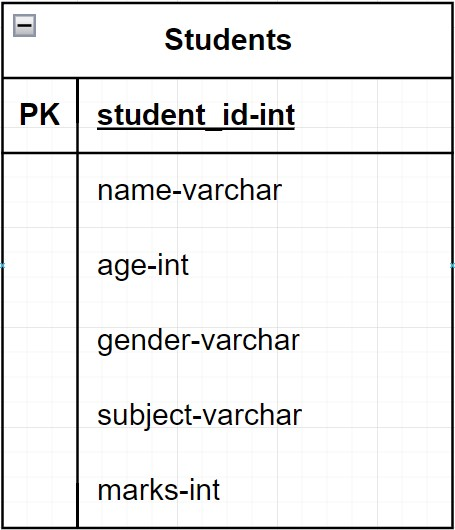

In [48]:
try:
    cur.execute("CREATE TABLE IF NOT EXISTS students (student_id int, name varchar,\
    age int, gender varchar, subject varchar, marks int)")
except psycopg2.Error as e:
    print("Error: Creating table")
    print(e)

## Truncate table

In [51]:
try:
    cur.execute("TRUNCATE students")
except psycopg2.Error as e:
    print("Error: Creating table")
    print(e)

## Insert the following two rows in the table
First Row: 1,"Raj",23,"Male","Python",85 \
Second Row: 2,"Priya",22,"Female","Python",86

In [52]:
try:
    cur.execute("INSERT INTO students (students_id, name, age, gender, subject, marks) \
                VALUES (%s, %s, %s, %s, %s, %s)", \
               (1,"Raj",23,"Male","Python",85))
except psycopg2.Error as e:
    print("Error: Creating table")
    print(e)
    
try:
    cur.execute("INSERT INTO students (students_id, name, age, gender, subject, marks) \
    VALUES (%s, %s, %s, %s, %s,%s)", \
               (2,"Priya",22,"Female","Python",86))
except psycopg2.Error as e:
    print("Error: Creating table")
    print(e)

## Validate your data was inserted into the table.

In [53]:
try:
    cur.execute("SELECT * FROM students")
except psycopg2.Error as e:
    print("Error: select *")
    print(e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(1, 'Raj', 23, 'Male', 'Python', 85)
(2, 'Priya', 22, 'Female', 'Python', 86)


## And finally close your connection and conection

In [54]:
cur.close()
conn.close()